In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


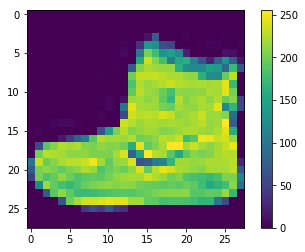

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0


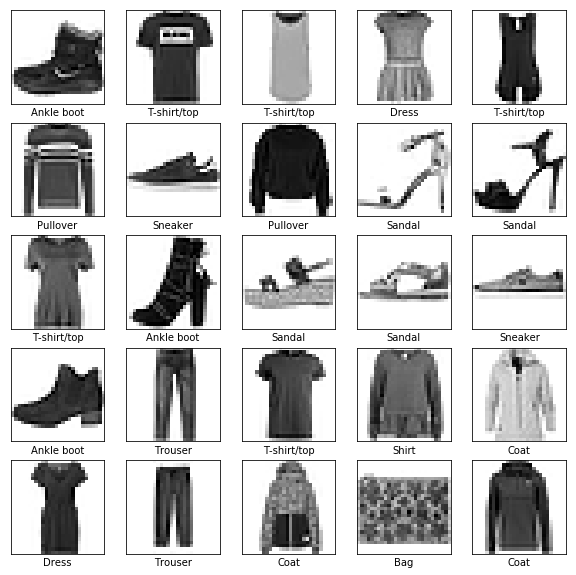

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
model.fit(train_images, train_labels, epochs=100)


Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1754 - acc: 0.9339
Epoch 2/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.1706 - acc: 0.9362
Epoch 3/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1677 - acc: 0.9371
Epoch 4/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1615 - acc: 0.9385
Epoch 5/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1595 - acc: 0.9403
Epoch 6/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1569 - acc: 0.9410
Epoch 7/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1507 - acc: 0.9438
Epoch 8/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1478 - acc: 0.9447
Epoch 9/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.1462 - acc: 0.9459
Epoch 10/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1428 - a

60000/60000 [==============================] - 3s 49us/step - loss: 0.0483 - acc: 0.9816
Epoch 82/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0529 - acc: 0.9802
Epoch 83/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0502 - acc: 0.9811
Epoch 84/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0515 - acc: 0.9809
Epoch 85/100
60000/60000 [==============================] - 3s 50us/step - loss: 0.0472 - acc: 0.9826
Epoch 86/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0511 - acc: 0.9812
Epoch 87/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0467 - acc: 0.9829
Epoch 88/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.0476 - acc: 0.9824
Epoch 89/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0469 - acc: 0.9828
Epoch 90/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0485 - acc: 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 56us/step
Test accuracy: 0.8869


In [11]:
predictions = model.predict(test_images)


In [12]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


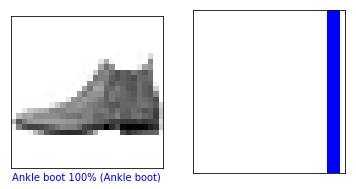

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


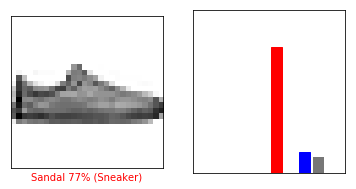

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


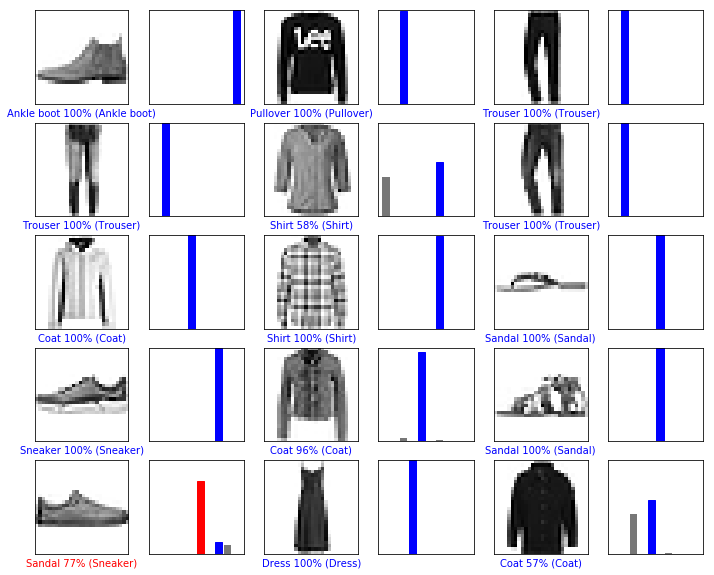

In [15]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [16]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)


(28, 28)


In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


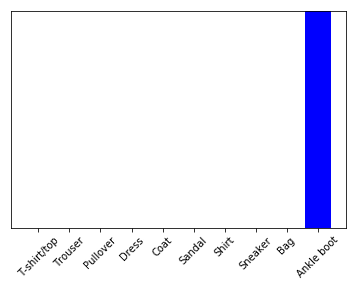

In [18]:
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

